In [1]:
setwd("/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1004. Wildfire ONES Analysis/P1004.2. Original Data")
Output = c("/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1004. Wildfire ONES Analysis/P1004.3. Heat Map/ Output")
cur_date = "020422"

library(readxl)
library(tidyverse)
library(reshape2)

#reading in file
gene_expression_data = read_csv("022821_NormCounts_pslog2_RUV.csv")
pathway_mRNAs = data.frame(read_excel("FlamingPeat_4h_pathwaymRNAs_020322.xlsx"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  X1 = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [2]:
head(gene_expression_data)
head(pathway_mRNAs)

X1,M1_RedOakSmolder,M2_RedOakSmolder,M3_RedOakSmolder,M4_RedOakSmolder,M5_RedOakSmolder,M6_RedOakSmolder,M7_PeatSmolder,M8_PeatSmolder,M9_PeatSmolder,⋯,MH73_RedOakSmolder,MH74_RedOakSmolder,MH75_RedOakSmolder,MH76_RedOakSmolder,MH77_PeatSmolder,MH78_PeatSmolder,MH79_PeatSmolder,MH80_PeatSmolder,MH81_PeatSmolder,MH82_PeatSmolder
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610009B22Rik_56046,6.001951,7.335479,7.061139,6.989344,6.384322,6.120804,5.820447,5.395755,6.660710,⋯,11.441009,10.903624,10.884591,10.933032,11.111472,11.197014,11.108450,10.699222,11.084482,10.868255
0610010F05Rik_69119,10.293167,9.755566,9.720385,10.272557,10.170494,10.212171,9.834238,10.386983,9.907812,⋯,9.303855,9.350846,9.622918,8.924832,8.982636,9.344629,9.039890,9.152558,9.578020,9.299622
0610010F05Rik_74637,4.693722,4.574181,5.542715,4.385701,3.715631,5.601566,5.219821,5.259070,5.376674,⋯,5.388887,5.117777,5.622112,5.674268,5.662769,4.709338,5.484767,5.224846,5.725906,4.860043
0610010K14Rik_31619,9.353322,8.368016,8.311618,8.280457,8.973519,8.977257,8.831136,9.169027,8.672639,⋯,7.627248,7.680924,7.873690,7.918498,7.629239,7.764098,7.952784,7.425485,7.370099,7.194414
0610010K14Rik_31873,9.230662,9.038618,8.758387,8.900100,9.868493,8.992879,9.160850,9.037294,8.829621,⋯,8.785173,8.773179,9.054666,8.336706,8.098710,8.662672,8.197349,8.505360,8.677667,8.136555
0610010K14Rik_68949,7.049897,7.538015,7.604721,7.000066,6.555433,7.193874,7.003423,7.018238,7.559411,⋯,7.121863,7.200933,7.541390,7.630316,7.163479,7.752922,7.555034,7.315125,7.527259,7.503961


,Gene
,<chr>
1,ABCC1
2,ABCC4
3,ACTA1
4,ACTB
5,ACTG1
6,AKR1A1


In [3]:
#reshaping for easier filtering
gene_expression_data = melt(gene_expression_data %>% 
                            rename(Gene = X1), variable = "Treatment", value.name = "NormCount")
head(gene_expression_data)

Using Gene as id variables



,Gene,Treatment,NormCount
,<chr>,<fct>,<dbl>
1,0610009B22Rik_56046,M1_RedOakSmolder,6.001951
2,0610010F05Rik_69119,M1_RedOakSmolder,10.293167
3,0610010F05Rik_74637,M1_RedOakSmolder,4.693722
4,0610010K14Rik_31619,M1_RedOakSmolder,9.353322
5,0610010K14Rik_31873,M1_RedOakSmolder,9.230662
6,0610010K14Rik_68949,M1_RedOakSmolder,7.049897


In [4]:
pathway_peatflame_df = gene_expression_data %>%
    #removing exposures that aren't peat flame or saline
    filter(grepl("PeatFlame", Treatment) | grepl("Saline", Treatment)) %>%
    #removing heart samples 
    filter(!grepl("MH", Treatment)) %>%
    #removing extra numbers after the underscore to make the next step easier
    separate(Gene, c("Gene", NA), sep = "_") %>%
    filter(tolower(Gene) %in% tolower(pathway_mRNAs$Gene)) %>%
    #adding another column that specifies only the treatment that will become useful later
    mutate(Tx = ifelse(grepl("Saline", Treatment), "Saline", "Peat Flame"))

head(pathway_peatflame_df)

#number of genes in our pathways of interest that will be in the final df
length(unique(pathway_peatflame_df$Gene))

,Gene,Treatment,NormCount,Tx
,<chr>,<fct>,<dbl>,<chr>
1,Abcc1,M31_Saline,8.671876,Saline
2,Abcc1,M31_Saline,7.370027,Saline
3,Abcc1,M31_Saline,7.740849,Saline
4,Abcc1,M31_Saline,5.855893,Saline
5,Abcc4,M31_Saline,2.382946,Saline
6,Abcc4,M31_Saline,5.774895,Saline


[1] 96

In [8]:
#lastly filtering for genes that were differentially expressed using a t test
t_test_results = data.frame()

for (i in 1:length(unique(pathway_peatflame_df$Gene))){
    #creating separate df for saline and peat flame conditions
    saline_df = pathway_peatflame_df %>%
        filter(Gene == pathway_peatflame_df$Gene[i] & Tx == "Saline")
    exposed_df = pathway_peatflame_df %>%
        filter(Gene == pathway_peatflame_df$Gene[i] & Tx == "Peat Flame")
    
    #running t test
    t_test = t.test(saline_df$NormCount, exposed_df$NormCount)
    t_test_results = rbind(t_test_results, cbind(Gene = pathway_peatflame_df$Gene[i], P.Value = t_test$p.value))
    
    
}

#final results
t_test_results = t_test_results %>%
    unique() %>%
    #getting padj values
    mutate(PAdj = p.adjust(P.Value, method = "BH"))

t_test_results

,Gene,P.Value,PAdj
,<fct>,<fct>,<dbl>
1,Abcc1,0.27727923192822,1
5,Abcc4,0.599592647610746,1
7,Acta1,0.987861019136809,1
10,Actb,0.493543701382166,1
13,Actg1,0.656711544296732,1
16,Adm,0.422796214149152,1
19,Akr1a1,0.0937685257822351,1
20,Akt3,0.375359779291716,1
22,Atf2,0.219658257919358,1


In [26]:
#well unfortunately all the padj values = 1, so the dataset will be filtered for genes that have p values < 0.1
sig_t_test_results = t_test_results %>%
    filter(as.numeric(as.character(P.Value)) < 0.1)
sig_t_test_results

Gene,P.Value,PAdj
<fct>,<fct>,<dbl>
Akr1a1,0.0937685257822351,1
Cct7,0.0195487481445736,1
Cdc34,0.0131133230218825,1
Clpp,0.0356654562854615,1
Creb3l1,0.0409150272740785,1
Dnaja2,0.0187581907820908,1
Fosl1,0.00739629287285485,1
Gclm,0.041994001263893,1
Gstm1,0.0462912403800984,1


In [28]:
#now creating a final df after filtering
final_df = pathway_peatflame_df %>%
    filter(Gene %in% sig_t_test_results$Gene)
head(final_df)

,Gene,Treatment,NormCount,Tx
,<chr>,<fct>,<dbl>,<chr>
1,Akr1a1,M31_Saline,9.963020,Saline
2,Cct7,M31_Saline,10.155294,Saline
3,Cdc34,M31_Saline,9.852226,Saline
4,Cdc34,M31_Saline,9.109160,Saline
5,Clpp,M31_Saline,8.656885,Saline
6,Creb3l1,M31_Saline,8.563512,Saline


In [29]:
#now organzing df for heat map

#getting gene ordered by average concentrations
desc_genes_df = final_df %>%
    group_by(Gene) %>%
    summarize(Avg_NormCount = mean(NormCount)) %>%
    arrange(Avg_NormCount)

head(desc_genes_df)

#getting treatment conditions ordered by average concentrations
desc_treatment_df = final_df %>%
    group_by(Tx, Treatment) %>%
    summarize(Avg_NormCount = mean(NormCount)) %>%
    arrange(desc(Tx), Avg_NormCount)

head(desc_treatment_df)

Gene,Avg_NormCount
<chr>,<dbl>
Fosl1,3.308005
Gclm,7.227131
Gstm1,7.921982
Creb3l1,8.003083
Clpp,8.537836
Cdc34,9.122172


`summarise()` has grouped output by 'Tx'. You can override using the `.groups` argument.



Tx,Treatment,Avg_NormCount
<chr>,<fct>,<dbl>
Saline,M106_Saline,7.768989
Saline,M33_Saline,7.825689
Saline,M36_Saline,7.946944
Saline,M35_Saline,8.076036
Saline,M32_Saline,8.093252
Saline,M105_Saline,8.129776


# Heat Map

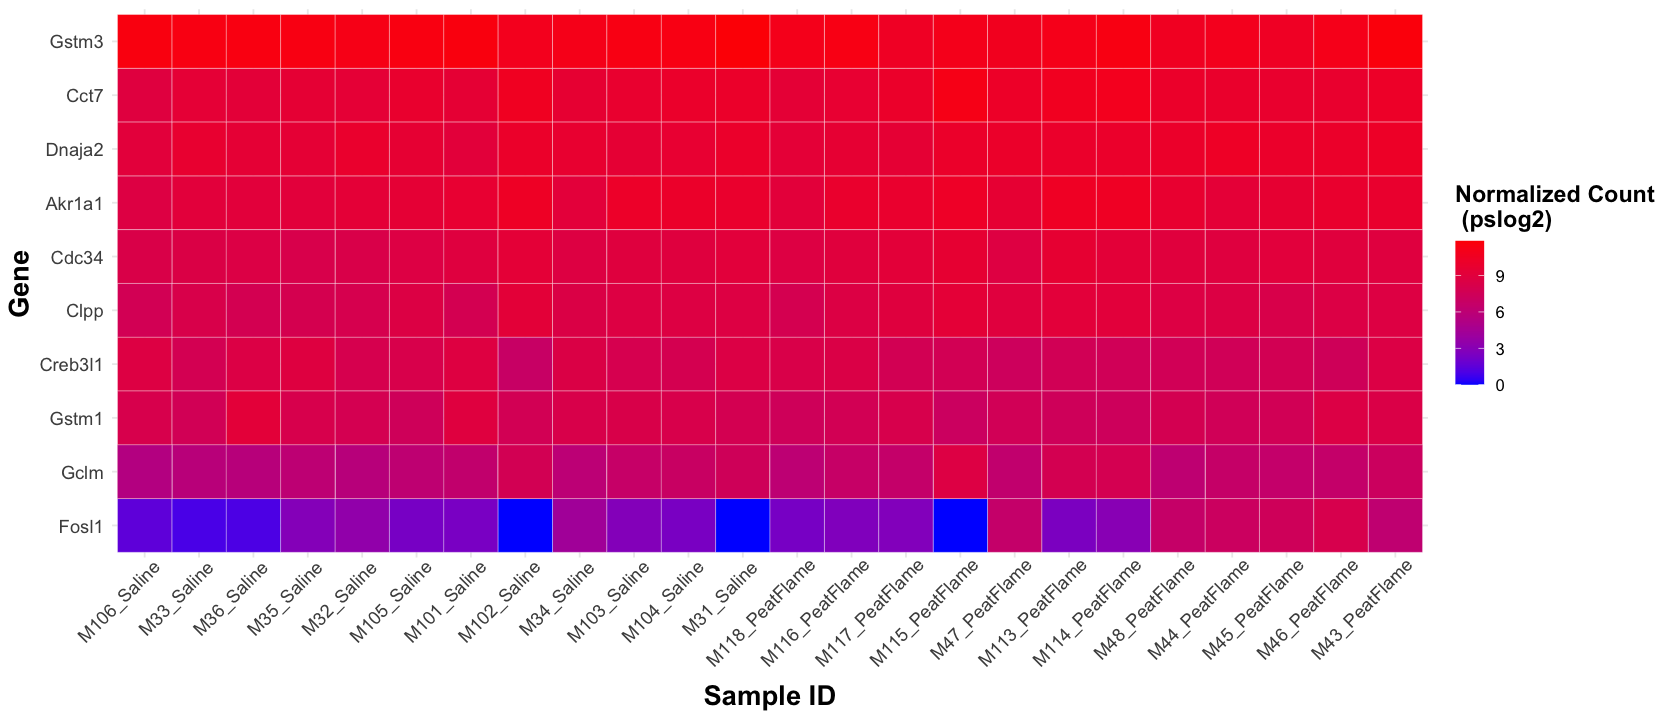

In [36]:
options(repr.plot.width=14, repr.plot.height=6) #changing size
 

#samples ordered by avg norm count
ordered_samples = factor(final_df$Treatment, levels = desc_treatment_df$Treatment)

#genes ordered by avg norm count
ordered_genes = factor(final_df$Gene, levels = desc_genes_df$Gene)

lung_peatflame_heatmap = ggplot(data = final_df, aes(x = ordered_samples, y = ordered_genes, fill = NormCount)) + 
  geom_tile(color = "white") + 
  scale_fill_gradient(low = 'blue', high = 'red') + 
  theme_minimal() + 
  theme(axis.text = element_text(size = 11), #changing size of axes labels
        axis.text.x = element_text(angle = 45, hjust = 0.9), #rotating x labels/ moving x labels slightly to the left
        axis.title = element_text(face = "bold", size = rel(1.5)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 10))+ #changes legend text

  labs(x = "Sample ID", y = "Gene", fill = "Normalized Count \n (pslog2)")

lung_peatflame_heatmap